In [30]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords 
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

In [5]:
df1 = pd.read_json('../dataset/Sarcasm_Headlines_Dataset.json', lines=True)
df2 = pd.read_json('../dataset/Sarcasm_Headlines_Dataset_v2.json', lines=True)

In [6]:
df1.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [7]:
len(df1)

26709

In [8]:
df2.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [9]:
len(df2)

28619

In [10]:
df = pd.concat([df1, df2], ignore_index=True) 

In [11]:
len(df)

55328

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55328 entries, 0 to 55327
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  55328 non-null  object
 1   headline      55328 non-null  object
 2   is_sarcastic  55328 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


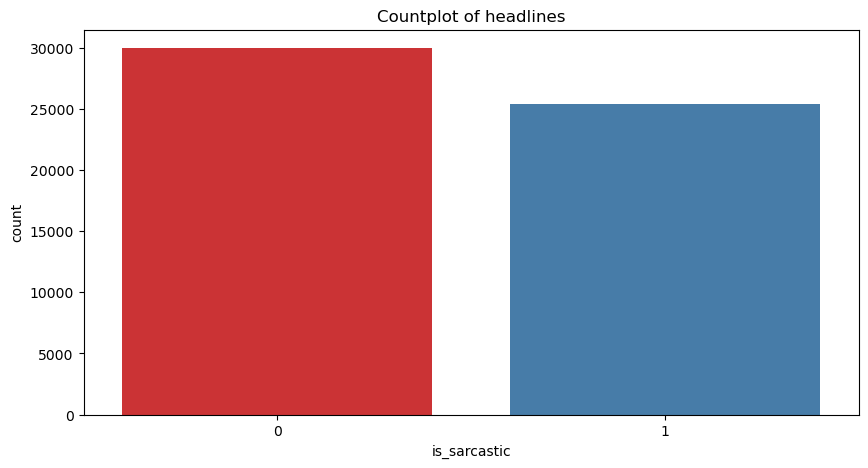

In [13]:
plt.figure(figsize=(10, 5)) 
sns.countplot(x='is_sarcastic', data=df, palette="Set1").set_title( 
    "Countplot of headlines") 
plt.show() 

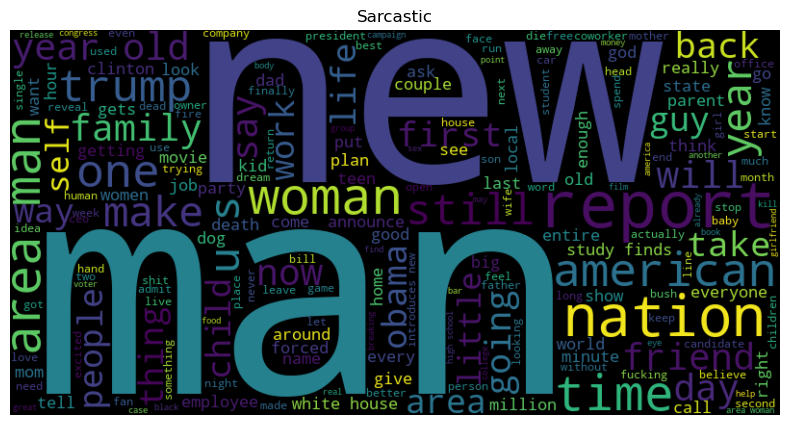

In [20]:
Sarcastic_text = ' '.join( 
    df['headline'][df['is_sarcastic'] == 1].tolist()) 
  
wordcloud = WordCloud(width=800, height=400, 
                      background_color='black').generate(Sarcastic_text) 
  
plt.figure(figsize=(10, 5)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off') 
plt.title('Sarcastic') 
plt.show() 

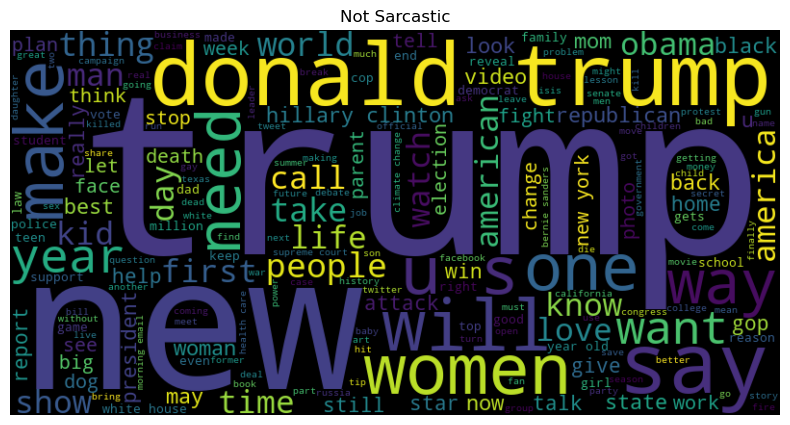

In [21]:
Non_Sarcastic_text = ' '.join( 
    df['headline'][df['is_sarcastic'] == 0].tolist()) 
  
wordcloud = WordCloud(width=800, height=400, 
                      background_color='black').generate(Non_Sarcastic_text) 
   
plt.figure(figsize=(10, 5)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off') 
plt.title('Not Sarcastic') 
plt.show() 

In [31]:
X = df['headline']
y = df['is_sarcastic']

X_train, test_text, y_train, test_labels = train_test_split(X, y, test_size=0.1, random_state=42)
train_text, valid_text, train_labels, valid_labels = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [32]:
test_text.to_csv('../dataset/test_dataset/test_text.csv', index=False)
test_labels.to_csv('../dataset/test_dataset/test_labels.csv', index=False)
train_text.to_csv('../dataset/train_dataset/train_text.csv', index=False)
train_labels.to_csv('../dataset/train_dataset/train_labels.csv', index=False)
valid_text.to_csv('../dataset/valid_dataset/valid_text.csv', index=False)
valid_labels.to_csv('../dataset/valid_dataset/valid_labels.csv', index=False)